### Huggingface model
- cardiffnlp/twitter-roberta-base-sentiment (58M)
- spacesedan/reddit-sentiment-analysis-longformer (149M)

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('reddit_sentiment_data_models.csv')

In [7]:
df.shape

(55546, 12)

In [4]:
# # Import required libraries for sentiment analysis
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import numpy as np
# from scipy.special import softmax
# import csv
# import urllib.request

/Users/wenshinluo/.pyenv/versions/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [7]:
# # Load the RoBERTa sentiment model
# # task = 'sentiment'
# MODEL = "spacesedan/reddit-sentiment-analysis-longformer"

# print("Loading tokenizer and model...")
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# # # Download label mapping
# # labels = []
# # mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
# # with urllib.request.urlopen(mapping_link) as f:
# #     html = f.read().decode('utf-8').split("\n")
# #     csvreader = csv.reader(html, delimiter='\t')
# # labels = [row[1] for row in csvreader if len(row) > 1]

# labels = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']

# print(f"Labels: {labels}")
# print("Model loaded successfully!")

Loading tokenizer and model...
Labels: ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
Model loaded successfully!


In [8]:
# Function to get sentiment score (0=Negative, 1=Neutral, 2=Positive)
def get_sentiment_score(text):
    if pd.isna(text) or text == '' or str(text).strip() == '':
        return 0  # Return 0 (Negative) for NaN or empty values
    
    try:
        # Preprocess the text
        processed_text = preprocess(str(text))
        
        # Tokenize and get model prediction
        encoded_input = tokenizer(processed_text, return_tensors='pt', truncation=True, max_length=512)
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        
        # Get the predicted class (0=Negative, 1=Neutral, 2=Positive)
        predicted_class = np.argmax(scores)
        return int(predicted_class)
    
    except Exception as e:
        print(f"Error processing text: {str(text)[:50]}... - {e}")
        return 0  # Return 0 (Negative) for errors as well

In [13]:
# %%time
# import time

# # Define your batch size and the total number of rows
# batch_size = 5000
# total_rows = len(df)

# # Loop through the DataFrame in batches
# for i in range(0, total_rows, batch_size):
#     start_time = time.time()  # Record the start time

#     # Select the current batch
#     batch_df = df.iloc[i:i + batch_size].copy()

#     # Apply sentiment analysis to the title and body columns of the batch
#     print(f"Analyzing sentiment for titles in batch {i // batch_size + 1}...")
#     batch_df['title_score_longformer'] = batch_df['title'].apply(get_sentiment_score)

#     print(f"Analyzing sentiment for bodies in batch {i // batch_size + 1}...")
#     batch_df['body_score_longformer'] = batch_df['body'].apply(get_sentiment_score)

#     # Save the processed batch to a new CSV file
#     file_name = f"sentiment_results_batch_{i // batch_size + 1}.csv"
#     batch_df.to_csv(file_name, index=False)

#     end_time = time.time()  # Record the end time
#     duration = end_time - start_time # Calculate the duration

#     print(f"Batch {i // batch_size + 1} saved to {file_name}")
#     print(f"Batch {i // batch_size + 1} took {duration:.2f} seconds to process.\n")

# print("All sentiment analysis and saving complete! 🎉")

Analyzing sentiment for titles in batch 1...
Analyzing sentiment for bodies in batch 1...
Batch 1 saved to sentiment_results_batch_1.csv
Batch 1 took 2505.81 seconds to process.

Analyzing sentiment for titles in batch 2...
Analyzing sentiment for bodies in batch 2...
Batch 2 saved to sentiment_results_batch_2.csv
Batch 2 took 2581.67 seconds to process.

Analyzing sentiment for titles in batch 3...
Analyzing sentiment for bodies in batch 3...
Batch 3 saved to sentiment_results_batch_3.csv
Batch 3 took 2645.66 seconds to process.

Analyzing sentiment for titles in batch 4...
Analyzing sentiment for bodies in batch 4...
Batch 4 saved to sentiment_results_batch_4.csv
Batch 4 took 2486.52 seconds to process.

Analyzing sentiment for titles in batch 5...
Analyzing sentiment for bodies in batch 5...
Batch 5 saved to sentiment_results_batch_5.csv
Batch 5 took 2640.95 seconds to process.

Analyzing sentiment for titles in batch 6...
Analyzing sentiment for bodies in batch 6...
Batch 6 saved t

In [14]:
import pandas as pd
import glob
import os

# Define the pattern to match all the output files
# This will find all files starting with "sentiment_results_batch_" and ending with ".csv"
file_pattern = "sentiment_results_batch_*.csv"

# Use glob to get a list of all matching file names
all_files = glob.glob(file_pattern)

# Create an empty list to hold the DataFrames
list_of_dfs = []

# Loop through the list of files, read each one, and append it to the list
for file in all_files:
    df_temp = pd.read_csv(file)
    list_of_dfs.append(df_temp)

# Concatenate all the DataFrames in the list into one single DataFrame
final_df = pd.concat(list_of_dfs, ignore_index=True)

# Optional: Save the final concatenated DataFrame to a new CSV file
# final_df.to_csv("all_sentiment_results_combined.csv", index=False)

print(f"Successfully concatenated {len(all_files)} files into one DataFrame.")
# print("The combined DataFrame has been saved to 'all_sentiment_results_combined.csv'.")

Successfully concatenated 12 files into one DataFrame.


In [8]:
df.head()

,title,score,comms_num,body,date,stock,title_score_stanza,body_score_stanza,title_score_roberta,body_score_roberta,title_score_longformer,body_score_longformer
0,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28,GME,1.0,1,0,1,1,0
1,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28,GME,1.0,0,1,0,0,0
2,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28,AMC,1.0,0,1,0,2,0
3,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,53,Hedgefund whales are spreading disinfo saying ...,2021-01-28,GME,1.0,1,0,0,2,0
4,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,53,Hedgefund whales are spreading disinfo saying ...,2021-01-28,BE,1.0,1,0,0,2,0


In [12]:
import matplotlib.pyplot as plt
import numpy as np

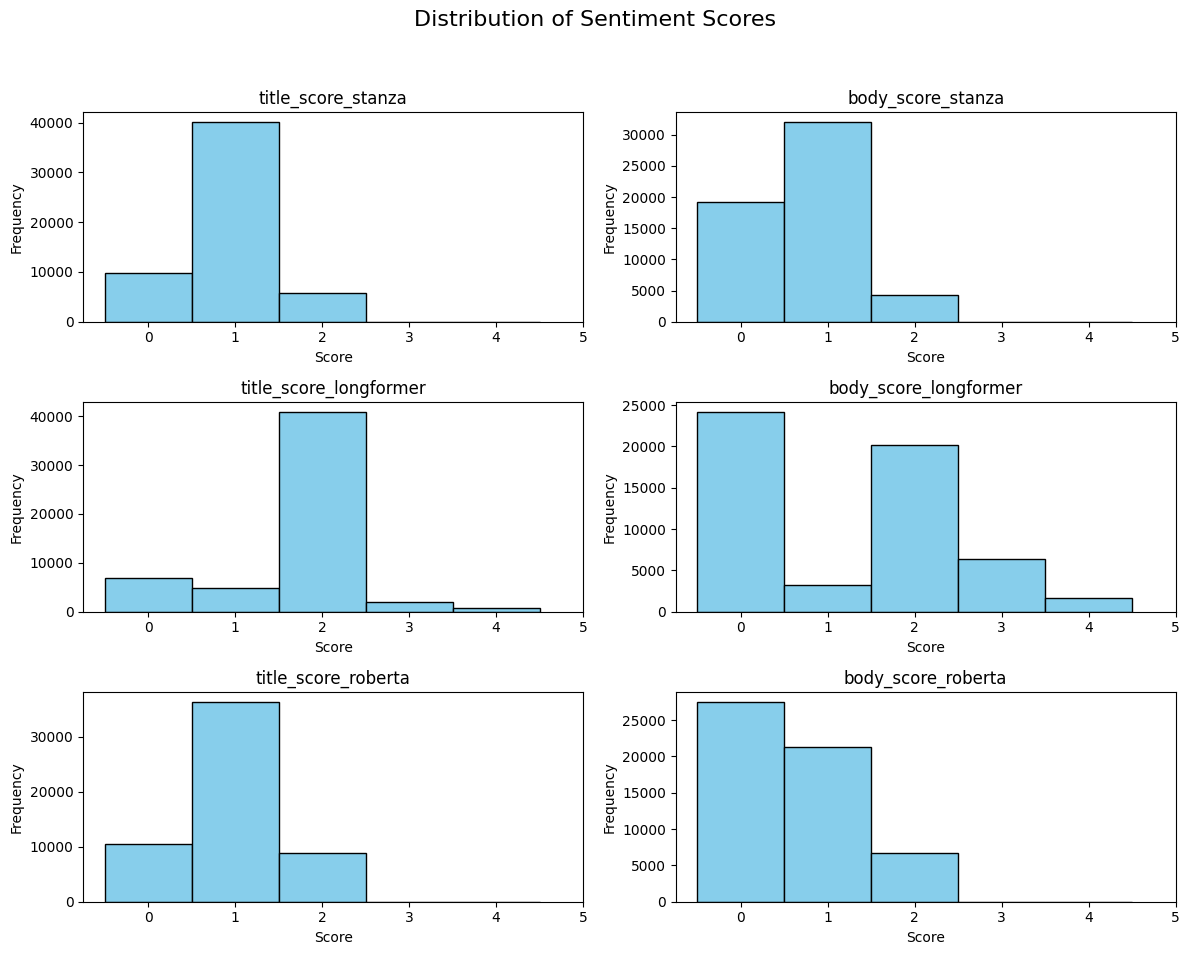

In [17]:
# Define the columns you want to plot
columns_to_plot = ['title_score_stanza', 'body_score_stanza', 'title_score_longformer', 'body_score_longformer', 'title_score_roberta', 'body_score_roberta']

# Create a figure with a 2x2 grid of subplots for the four histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distribution of Sentiment Scores', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot a histogram for each
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=np.arange(6) - 0.5, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(6)) # Set x-ticks to be integers 0, 1, 2, 3, 4, 5

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('sentiment_score_distributions.png')
plt.show()